In [1]:
import tensorflow_probability as tfp 
from tensorflow_probability import distributions as d
import matplotlib.pyplot as plt
%matplotlib inline

mvn = d.MultivariateNormalDiag
mvn1 = mvn(loc=[-3, 0])
mvn2 = mvn(loc=[3, 0])

In [2]:
dist = d.Mixture(cat=d.Categorical([0.5, 0.5]), components=[mvn1, mvn2])

In [3]:
samples = dist.sample(10000)
probs = dist.prob(samples)

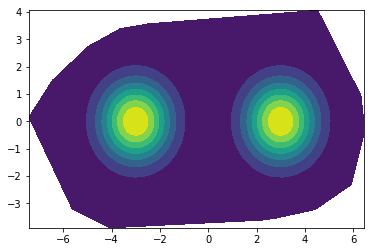

In [4]:
plt.tricontourf(*samples.numpy().T, probs)

In [5]:
import tensorflow.keras as tfk

In [6]:
hidden_size = 128
activation = "tanh"

net = tfk.Sequential([
    tfk.layers.InputLayer(2),
    tfk.layers.Dense(hidden_size, activation=activation),
    tfk.layers.Dense(hidden_size, activation=activation),
    tfk.layers.Dense(hidden_size, activation=activation),
    tfk.layers.Dense(1)
])

model = tfk.Model(inputs=net.inputs, outputs=net.outputs)
model.compile(loss="mse")

In [7]:
model.fit(x=samples, y=probs, epochs=100)

Epoch 1/100
313/313 [==============================] - 0s 917us/step - loss: 0.0362
Epoch 2/100
313/313 [==============================] - 0s 883us/step - loss: 0.0026
Epoch 3/100
313/313 [==============================] - 0s 878us/step - loss: 0.0017
Epoch 4/100
313/313 [==============================] - 0s 885us/step - loss: 0.0018
Epoch 5/100
313/313 [==============================] - 0s 925us/step - loss: 0.0012
Epoch 6/100
313/313 [==============================] - 0s 866us/step - loss: 8.6100e-04
Epoch 7/100
313/313 [==============================] - 0s 832us/step - loss: 7.4727e-04
Epoch 8/100
313/313 [==============================] - 0s 867us/step - loss: 6.5911e-04
Epoch 9/100
313/313 [==============================] - 0s 879us/step - loss: 5.9762e-04
Epoch 10/100
313/313 [==============================] - 0s 864us/step - loss: 5.7263e-04
Epoch 11/100
313/313 [==============================] - 0s 906us/step - loss: 5.1358e-04
Epoch 12/100
313/313 [============================

313/313 [==============================] - 0s 862us/step - loss: 7.1459e-06
Epoch 94/100
313/313 [==============================] - 0s 824us/step - loss: 7.0740e-06
Epoch 95/100
313/313 [==============================] - 0s 842us/step - loss: 7.0373e-06
Epoch 96/100
313/313 [==============================] - 0s 860us/step - loss: 7.0033e-06
Epoch 97/100
313/313 [==============================] - 0s 848us/step - loss: 6.7087e-06
Epoch 98/100
313/313 [==============================] - 0s 860us/step - loss: 7.1075e-06
Epoch 99/100
313/313 [==============================] - 0s 840us/step - loss: 6.5327e-06
Epoch 100/100
313/313 [==============================] - 0s 826us/step - loss: 6.5301e-06


In [8]:
probs_pred = model(samples)

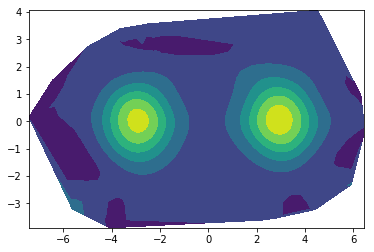

In [9]:
plt.tricontourf(*samples.numpy().T, probs_pred[:, 0])